## Home Credit Indonesia Data Scientist Project Based Internship Program

##### Task : Home Credit Scorecard Model
##### Author: M. Rifki Oskar

#### Problem Statement

#### Goal

#### Import Library

In [1]:
## BASIC LIBRARY
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## VISUALIZATION LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
## use data train
df = pd.read_csv('home-credit-default-risk/application_train.csv', low_memory=False)
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,NaN,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

#### 1. Exploratory Data Analysis

In [4]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### 1.1 Descriptive Statistics

##### 1.1.1 Numerical Features

In [5]:
## Descriptive Statistics Numerical
num_features = df.select_dtypes(include=['int64', 'float'])
print('Total Numerical Features = {}'.format(num_features.shape[1]))

Total Numerical Features = 106


In [6]:
num_features.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 106 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    CNT_CHILDREN                  int64  
 3    AMT_INCOME_TOTAL              float64
 4    AMT_CREDIT                    float64
 5    AMT_ANNUITY                   float64
 6    AMT_GOODS_PRICE               float64
 7    REGION_POPULATION_RELATIVE    float64
 8    DAYS_BIRTH                    int64  
 9    DAYS_EMPLOYED                 int64  
 10   DAYS_REGISTRATION             float64
 11   DAYS_ID_PUBLISH               int64  
 12   OWN_CAR_AGE                   float64
 13   FLAG_MOBIL                    int64  
 14   FLAG_EMP_PHONE                int64  
 15   FLAG_WORK_PHONE               int64  
 16   FLAG_CONT_MOBILE              int64  
 17   FLAG_PHONE                    int64  
 18   FL

In [7]:
num_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
TARGET,307511.000000,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000
CNT_CHILDREN,307511.000000,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
REGION_POPULATION_RELATIVE,307511.000000,0.020868,0.013831,0.000290,0.010006,0.018850,0.028663,0.072508
DAYS_BIRTH,307511.000000,-16036.995067,4363.988632,-25229.000000,-19682.000000,-15750.000000,-12413.000000,-7489.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000


**result**

- Irrelevant features such as feature that has the number of unique values equal to the number of rows need to be removed.
- Based on the min and max values there are 98 columns that have outliers.

In [8]:
## Drop unnecessary features
df.drop(columns = ['SK_ID_CURR'], inplace = True)

##### 1.1.2 Categorical Features

In [9]:
## Descriptive Statistics Categorical

cat_features = df.select_dtypes(include=['object'])
print('Total categorical features = {}'.format(cat_features.shape[1]))

Total categorical features = 16


In [10]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

In [11]:
cat_features.describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [12]:
cat_uniq = cat_features.describe().transpose()
cat_uniq['unique_values'] = [cat_features[i].unique() for i in cat_features.columns]
cat_uniq

,count,unique,top,freq,unique_values
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,"[Cash loans, Revolving loans]"
CODE_GENDER,307511,3,F,202448,"[M, F, XNA]"
FLAG_OWN_CAR,307511,2,N,202924,"[N, Y]"
FLAG_OWN_REALTY,307511,2,Y,213312,"[Y, N]"
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526,"[Unaccompanied, Family, Spouse, partner, Child..."
NAME_INCOME_TYPE,307511,8,Working,158774,"[Working, State servant, Commercial associate,..."
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391,"[Secondary / secondary special, Higher educati..."
NAME_FAMILY_STATUS,307511,6,Married,196432,"[Single / not married, Married, Civil marriage..."
NAME_HOUSING_TYPE,307511,6,House / apartment,272868,"[House / apartment, Rented apartment, With par..."
OCCUPATION_TYPE,211120,18,Laborers,55186,"[Laborers, Core staff, Accountants, Managers, ..."


**Result**

- The invalid values in CODE_GENDER (XNA)

#### 2. Data Preprocessing

#### 2.1 Handle Missing Values

In [13]:
# Check the missing values percentage
df_preprocessing = pd.DataFrame(df.isnull().sum(), columns = ['Null Values'])
df_preprocessing['Percentage'] = (df_preprocessing['Null Values'] / df.shape[0]) * 100
df_preprocessing = df_preprocessing.sort_values(by = ['Percentage'], ascending = False).reset_index().rename(columns={'index': 'Features'})
df_preprocessing

,Features,Null Values,Percentage
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


**Result**
- Based on the percentage of missing values above, we will remove features that have more than 30% missing values.

In [14]:
# Remove unnecessary features
features = df_preprocessing[df_preprocessing['Percentage'] > 30]['Features']
df_cleaned = df.drop(columns=features)
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,NaN,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000

In [15]:
# Show missing values
df_cleaned.isnull().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
R

In [16]:
## Drop unnecessary features
df_cleaned.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
         'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
         'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
        ], inplace=True, axis=1)

In [17]:
# Imputation with mean
df_cleaned['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_3'].mean(), inplace = True)
df_cleaned['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace = True)

# Imputation with mode
df_cleaned['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace = True)
df_cleaned['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mode()[0], inplace = True)
df_cleaned['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0], inplace = True)
df_cleaned['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0], inplace = True)
df_cleaned['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mode()[0], inplace = True)

In [18]:
df_cleaned.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

#### 2.2 Duplicated Data

In [19]:
# Show the duplicate data
df_cleaned.duplicated().sum()

0

#### 3. Business Insight

#### 3.1 Univariate Analysis

In [20]:
# Change the values in the 'target' column from 1 and 0 to 'yes' and 'no'
df_cleaned['TARGET'] = df_cleaned['TARGET'].map({1: 'yes', 0: 'no'})

# calculate statistics
viz_status = df_cleaned.groupby('TARGET').size().reset_index()
viz_status.columns = ['target', 'total']
viz_status['%'] = round(viz_status['total'] * 100 / sum(viz_status['total']), 2)
viz_status.sort_values(by='total', ascending=False)

,target,total,%
0,no,282686,91.930000
1,yes,24825,8.070000


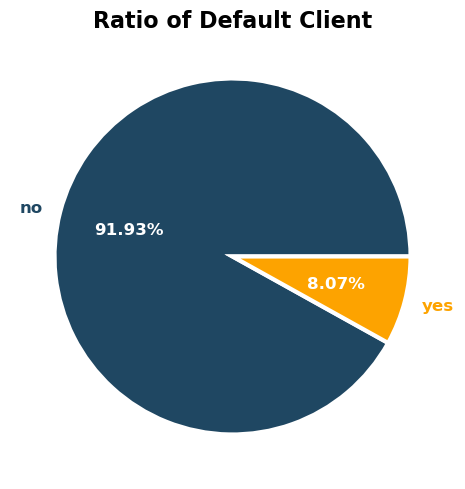

In [21]:
## Visualization
fig, ax = plt.subplots(figsize=(5,5))
##---------------------------------------
patches, texts, pcts = ax.pie(viz_status['total'], labels=viz_status['target'], autopct='%.2f%%',
                              wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
                              textprops = {'size': 'large'},
                              colors=['#1f4762', '#fda300']
                             )
##---------------------------------------
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Ratio of Default Client', fontsize=16, pad=5, loc='center', fontweight='bold')
plt.tight_layout()

#### 3.1.1 Numerical Data

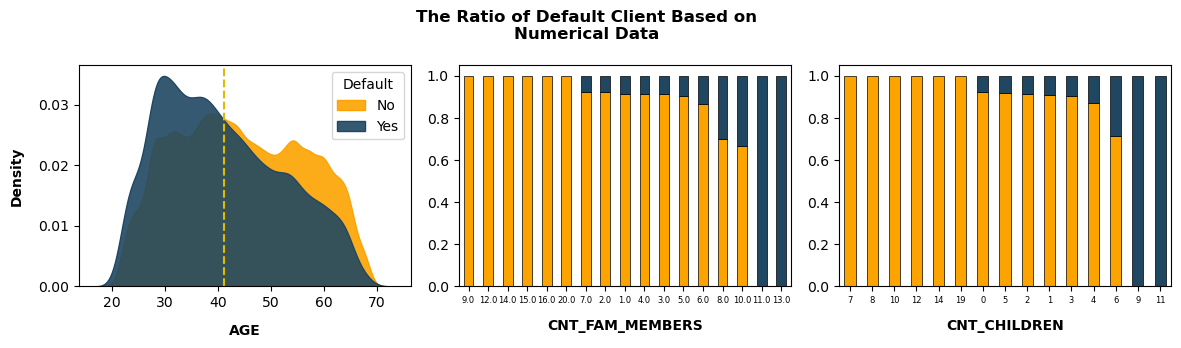

In [22]:
# Adjust image size
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

# Create the num_columns list
num_columns = ['DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Data visualization
for i in range(len(num_columns)):
    plt.subplot(1, 3, i+1)
    
    # Divide data based on Target
    data_no = df_cleaned[df_cleaned['TARGET'] == 'no']
    data_yes = df_cleaned[df_cleaned['TARGET'] == 'yes']
    
    if i in [0]:
      sns.kdeplot(x = data_no[num_columns[i]] / -365, color = '#fda300', fill = True, alpha = 0.9)
      sns.kdeplot(x = data_yes[num_columns[i]] / -365, color = '#1f4762', fill = True, alpha = 0.9)
      plt.axvline(x = 41, color='#deba04', linestyle='--')
      
      # Adjust xlabel
      plt.xlabel('AGE', fontweight = 'bold', labelpad = 10)
   
    else:
      df_num = df_cleaned.groupby([num_columns[i]])['TARGET'].value_counts(normalize=True).unstack()
      df_num = df_num.sort_values('no', ascending=False)
      
      # Create a barchart
      ax1 = df_num.plot.bar(stacked = True, color=['#fda300', '#1f4762'], edgecolor='black', linewidth=0.5, ax=ax[i])

      # Adjust xlabel
      plt.xlabel(num_columns[i], fontweight = 'bold', labelpad = 10)
      
    if i in [1, 2]:
      # Adjust xticks
      ax1.set_xticklabels(df_num.index, fontsize = 6, rotation = 0)

    # Adjust ylabel
    if i in [0]:
        plt.ylabel('Density', fontweight = 'bold', labelpad = 10)
    else:
        plt.ylabel('')

    # Add a legend
    if i == 0:
        plt.legend(title = 'Default', labels=['No', 'Yes'], loc = 'upper right')
    else:
        plt.legend().set_visible(False)
        
# Add title
plt.suptitle('The Ratio of Default Client Based on\nNumerical Data', fontweight = 'bold')

# Show the graph
plt.tight_layout()
plt.show()

**Result**

- The older the clients, the less likely to become default clients.
- The more family members and children, the more likely, to become the default clients.

#### 3.1.2 Categorical Data

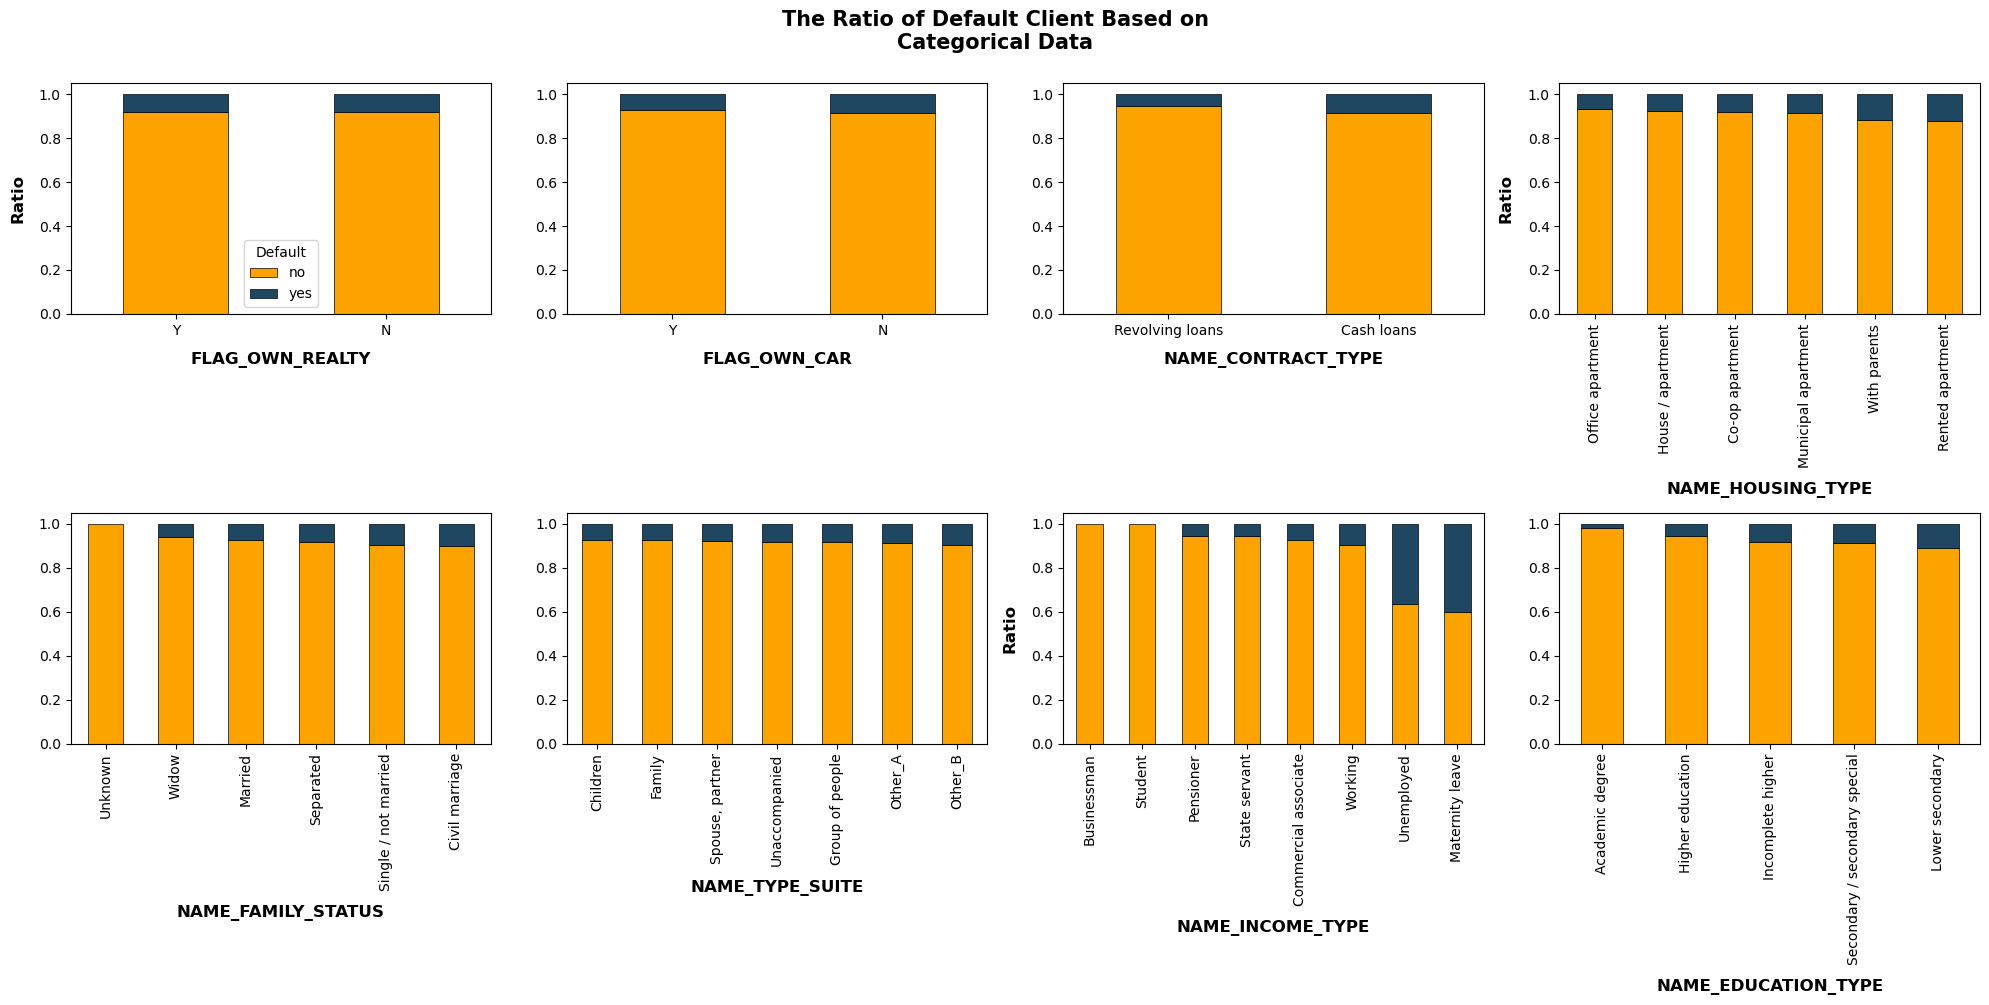

In [76]:
# Adjust image size
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Make the cat_columns list
cat_columns = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR',  'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 
               'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'] 

# Calculate the proportion of loan_approved for the cat_columns list
for i, cat_column in enumerate(cat_columns):
    df_cat = df_cleaned.groupby([cat_column])['TARGET'].value_counts(normalize=True).unstack()
    df_cat = df_cat.sort_values('no', ascending=False)
    
    # Create a barchart
    ax1 = df_cat.plot.bar(stacked=True, color=['#fda300', '#1f4762'], edgecolor='black', linewidth=0.5, ax=ax[i // 4, i % 4])

    # Adjust xticks
    if i in [0, 1, 2]:
        ax1.set_xticklabels(df_cat.index, rotation = 0)

    # Adjust xlabel
    ax1.set_xlabel(cat_column, fontsize = 12, fontweight = 'bold', labelpad = 10)

    # Adjust ylabel
    if i in [0, 3, 6]:
        ax1.set_ylabel('Ratio', fontsize = 12, fontweight = 'bold', labelpad = 10)
    else:
        ax1.set_ylabel('')

    # Add legend
    if i in [0]:
      ax1.legend(title = 'Default', loc = 'lower center')
    else:
      ax1.get_legend().remove()

# Add title
plt.suptitle('The Ratio of Default Client Based on\nCategorical Data', fontweight='bold', fontsize=15, y=1)

# Show the graph
plt.tight_layout()
plt.show()

**Results**
- The ratio of default clients who own a house or car is not much different from clients who do not own a house or car.
- Cash loans have a slightly higher default ratio compared to Revolving loans.
- Clients who own a house less likely to become default clients.
- The highest ratio of default clients comes from NAME_FAMILY_STATUS Civil marriage and the lowest comes from Widow.
- Clients who are accompanied by family or partner when applying for the loan are less likely to become default clients.
- The highest ratio of default clients comes from Maternity leave and Unemployed clients and the lowest comes from Businessman.
- The higher the education, the less likely to become the default clients.

#### 4. Feature Selection

#### 4.1 Multivariate Analysis

#### 4.1.1 Predictive Power Score

In [24]:
# Install ppscore package
!pip install -U ppscore

In [25]:
# Import library
import ppscore as pps

# Make pivot table ppscore
df_pps = pps.matrix(df_cleaned)

In [26]:
# Create pivot table for pps
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')
matrix_df = matrix_df[matrix_df['TARGET'] != 0]
matrix_df = matrix_df[matrix_df.index]
matrix_df

x,DAYS_BIRTH,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET
y,,,,,,
DAYS_BIRTH,1.000000,0.000942,0.016667,0.062121,0.037476,0.001632
NAME_CONTRACT_TYPE,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
NAME_EDUCATION_TYPE,0.000000,0.000000,1.000000,0.000000,0.001091,0.000000
NAME_FAMILY_STATUS,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
NAME_HOUSING_TYPE,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
TARGET,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


#### 4.1.2 Correlation Check

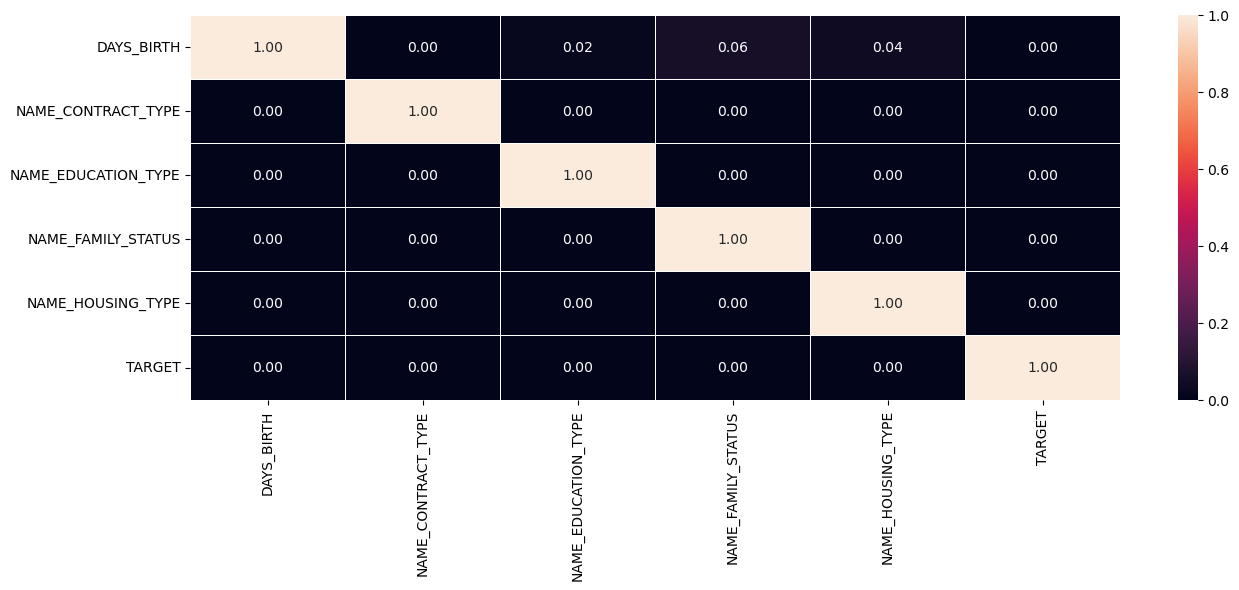

In [27]:
# Adjust image size
plt.figure(figsize = (15, 5))

# Create heatmap
sns.heatmap(matrix_df, annot = True, fmt='.2f', linewidths = 0.5)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### 5. Feature Encoding

In [28]:
df_fix = df[matrix_df.index]

In [29]:
df_fix.sample(3)

,DAYS_BIRTH,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET
258354,-12682,Cash loans,Secondary / secondary special,Married,House / apartment,0
82547,-20931,Cash loans,Secondary / secondary special,Married,House / apartment,0
116864,-12636,Cash loans,Higher education,Married,House / apartment,0


In [30]:
# Mencari nilai unik di seluruh DataFrame
unique_values_per_column = df_fix.apply(lambda col: col.unique())

# Menampilkan hasil
unique_values_per_column

DAYS_BIRTH             [-9461, -16765, -19046, -19005, -19932, -16941...
NAME_CONTRACT_TYPE                         [Cash loans, Revolving loans]
NAME_EDUCATION_TYPE    [Secondary / secondary special, Higher educati...
NAME_FAMILY_STATUS     [Single / not married, Married, Civil marriage...
NAME_HOUSING_TYPE      [House / apartment, Rented apartment, With par...
TARGET                                                            [1, 0]
dtype: object

In [31]:
## Label Encoding
df_fix['NAME_CONTRACT_TYPE'] = np.where(df_fix['NAME_CONTRACT_TYPE'] == 'Cash loans', 1, 0)
df_fix['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 1, 'Secondary / secondary special': 
                                                           2,'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5})

In [32]:
df_fix['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

1   90.478715
0    9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [33]:
df_fix['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

2   71.018923
4   24.344820
3    3.341994
1    1.240931
5    0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

In [34]:
categorical_cols = [col for col in df_fix.select_dtypes(include='object').columns.tolist()]

In [35]:
categorical_cols

['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

In [36]:
## One Hot Encoding
onehot = pd.get_dummies(df_fix[categorical_cols], drop_first=True)

onehot.sample(5)

,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
234053,0,0,0,0,1,1,0,0,0,0
196844,1,0,0,0,0,1,0,0,0,0
273256,1,0,0,0,0,1,0,0,0,0
56582,0,0,1,0,0,1,0,0,0,0
303067,1,0,0,0,0,1,0,0,0,0


#### 6. Standardization

In [37]:
categorical_cols = [col for col in df_fix.select_dtypes(include='object').columns.to_list()]
numerical_cols = [col for col in df_fix.columns.to_list() if col in ['DAYS_BIRTH', 'NAME_EDUCATION_TYPE']]

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df_fix[numerical_cols]), columns=numerical_cols)

In [39]:
std.sample(3)

,DAYS_BIRTH,NAME_EDUCATION_TYPE
216064,-1.533005,-0.582598
1534,-0.099452,1.704312
119205,0.285976,-0.582598


In [40]:
df_model = pd.concat([onehot, std, df_fix[['TARGET', 'NAME_CONTRACT_TYPE']]], axis=1)

#### 7. Split data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_model.drop('TARGET', axis=1)
y = df_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape

((246008, 13), (61503, 13))

In [44]:
X_train.isnull().sum()

NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Separated               0
NAME_FAMILY_STATUS_Single / not married    0
NAME_FAMILY_STATUS_Unknown                 0
NAME_FAMILY_STATUS_Widow                   0
NAME_HOUSING_TYPE_House / apartment        0
NAME_HOUSING_TYPE_Municipal apartment      0
NAME_HOUSING_TYPE_Office apartment         0
NAME_HOUSING_TYPE_Rented apartment         0
NAME_HOUSING_TYPE_With parents             0
DAYS_BIRTH                                 0
NAME_EDUCATION_TYPE                        0
NAME_CONTRACT_TYPE                         0
dtype: int64

#### 8. Check Outliers

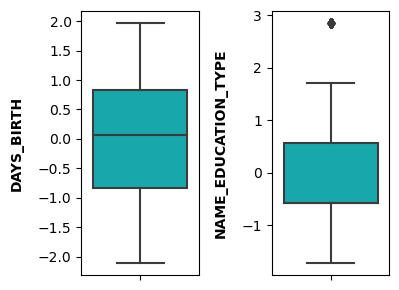

In [45]:
# Create the train_columns variable
train_columns = ['DAYS_BIRTH', 'NAME_EDUCATION_TYPE']

# Adjust the image size
plt.figure(figsize = (6, 3))

# Menampilkan boxplot kolom numerik
for i in range(len(train_columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = X_train[train_columns[i]], color = '#00bfc4', orient = 'v')
    plt.ylabel(train_columns[i], fontweight = 'bold', fontsize = 10, labelpad = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

# Show the graph
plt.show()

#### 9. Check Class Imbalance

In [46]:
# Divide dataset to feature and target
x = X_train
y = y_train

print("Comparison between TARGET classes before class imbalance is handled:")
print(pd.Series(y).value_counts())

Comparison between TARGET classes before class imbalance is handled:
0    226132
1     19876
Name: TARGET, dtype: int64


In [47]:
pip install -U imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Perform handling class imbalance
from imblearn import over_sampling
X_train, y_train = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)

print("Comparison between TARGET classes after class imbalance is handled:")
print(pd.Series(y_train).value_counts())

Comparison between TARGET classes after class imbalance is handled:
0    226132
1    226132
Name: TARGET, dtype: int64


#### 10. Modelling

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_clasification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Tes Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Tes Set): %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

**GradientBoosting**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_clasification(gbc)

Accuracy (Tes Set) : 0.63
Precision (Tes Set): 0.12
Recall (Test Set): 0.54
AUC (Test Proba): 0.62
AUC (train-proba) : 0.63
roc_auc (crossval train): 0.6293103178062593
roc_auc (crossval test): 0.6200815130542816


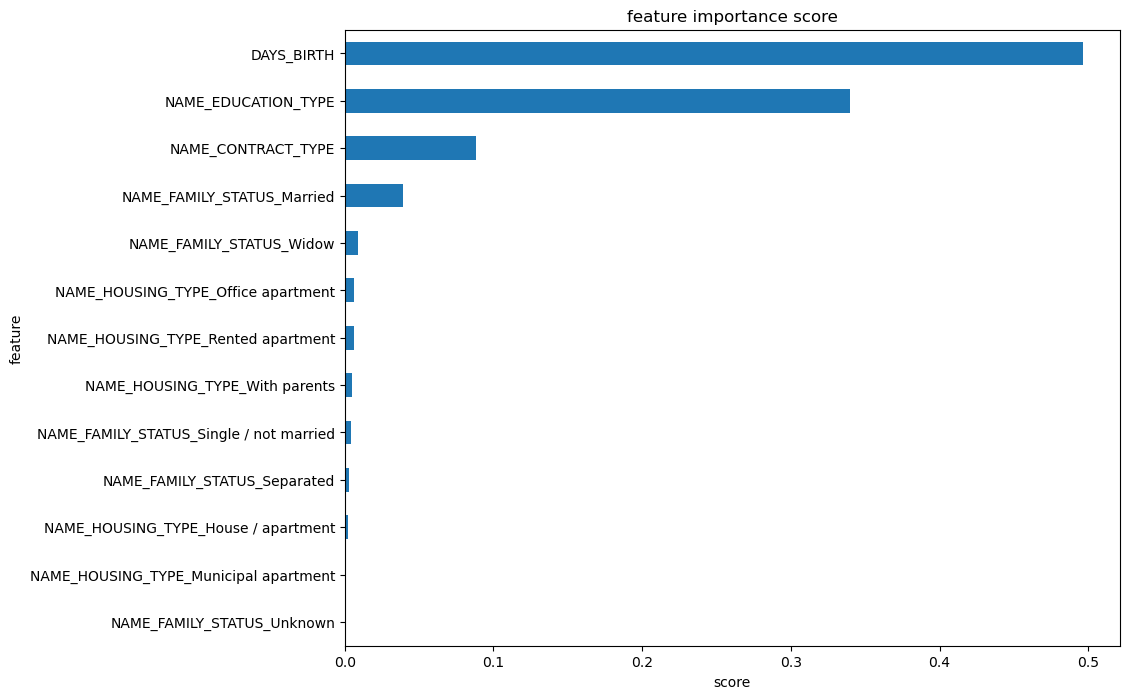

In [55]:
show_feature_importance(gbc)

**AdaBoosting**

In [58]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_clasification(abc)

Accuracy (Tes Set) : 0.57
Precision (Tes Set): 0.11
Recall (Test Set): 0.62
AUC (Test Proba): 0.63
AUC (train-proba) : 0.62
roc_auc (crossval train): 0.621631557025036
roc_auc (crossval test): 0.6185062790592148


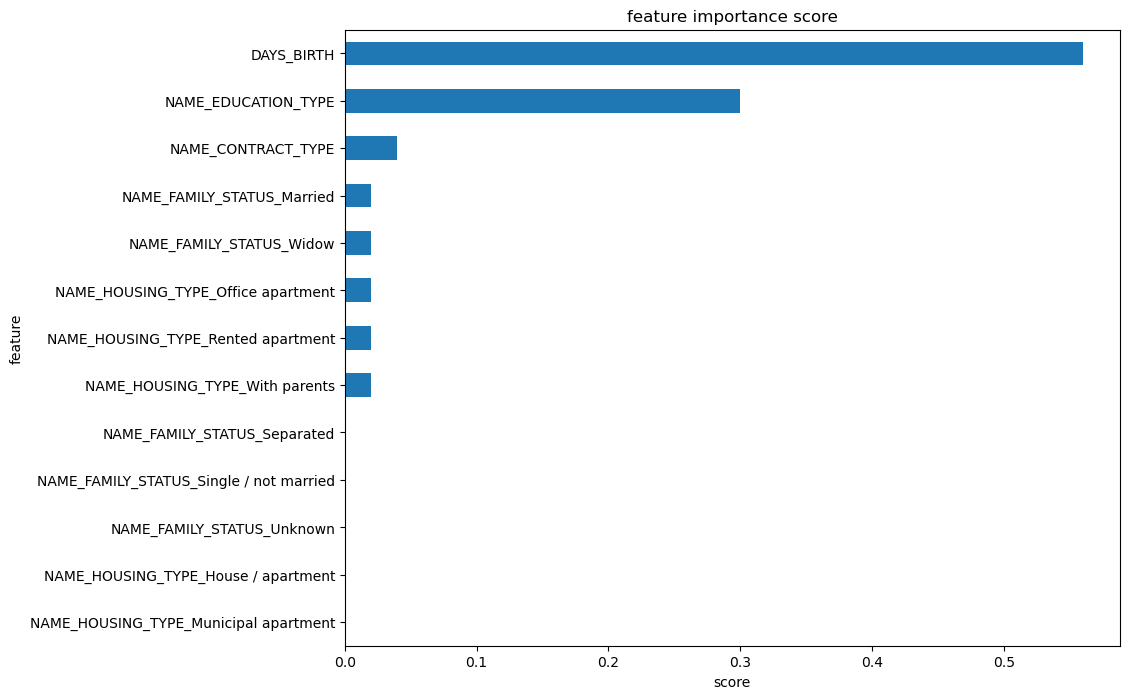

In [59]:
show_feature_importance(abc)

**XGBoost**

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_clasification(xg)

Accuracy (Tes Set) : 0.60
Precision (Tes Set): 0.11
Recall (Test Set): 0.56
AUC (Test Proba): 0.61
AUC (train-proba) : 0.66
roc_auc (crossval train): 0.6627317963375232
roc_auc (crossval test): 0.6098570081673846


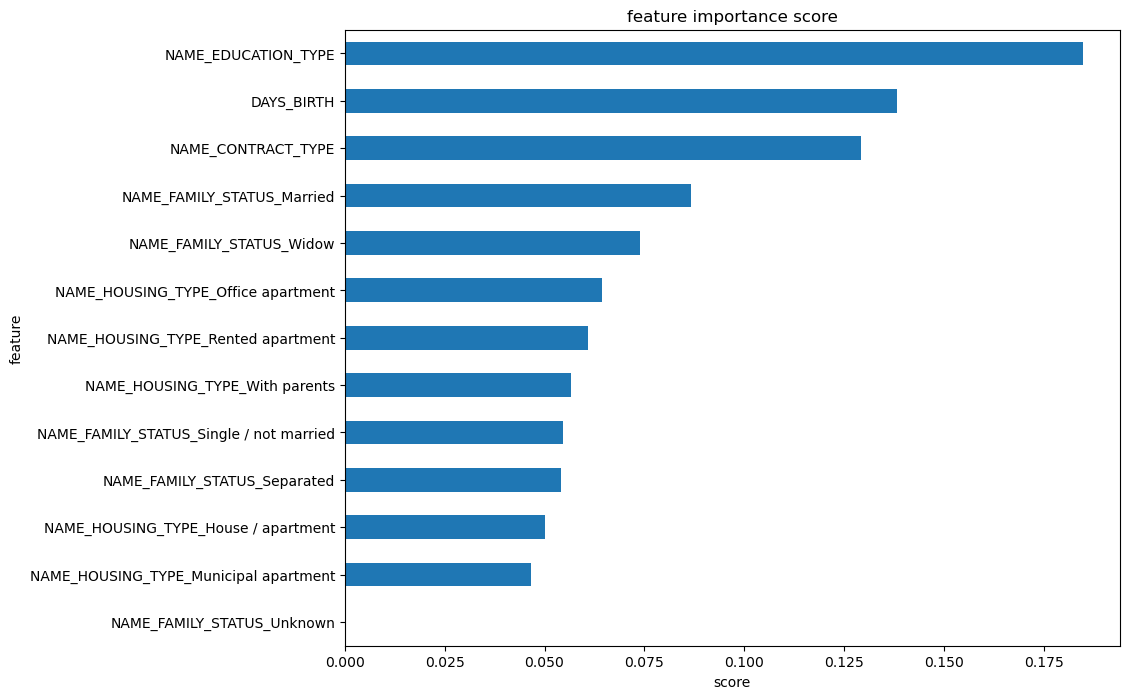

In [62]:
show_feature_importance(xg)

**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_clasification(dt)

Accuracy (Tes Set) : 0.77
Precision (Tes Set): 0.09
Recall (Test Set): 0.20
AUC (Test Proba): 0.52
AUC (train-proba) : 1.00
roc_auc (crossval train): 0.9710510613979662
roc_auc (crossval test): 0.5125562253081235


In [66]:
y_pred_proba = gbc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

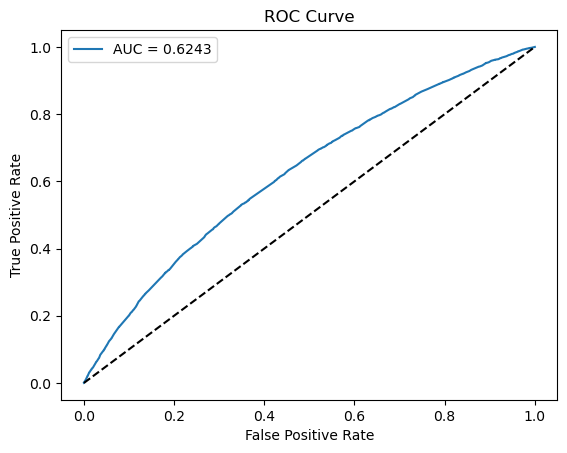

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

**Confusion Matrix**

In [68]:
from sklearn.metrics import confusion_matrix

Ytrue = y_test
Ypred = pd.Series(abc.predict(X_test))

cm_gbc = confusion_matrix(Ytrue, Ypred)
cm_gbc

array([[31935, 24619],
       [ 1901,  3048]], dtype=int64)

In [69]:
TP = cm_gbc[0][0]
FN = cm_gbc[1][0]
FP = cm_gbc[0][1]
TN = cm_gbc[1][1]

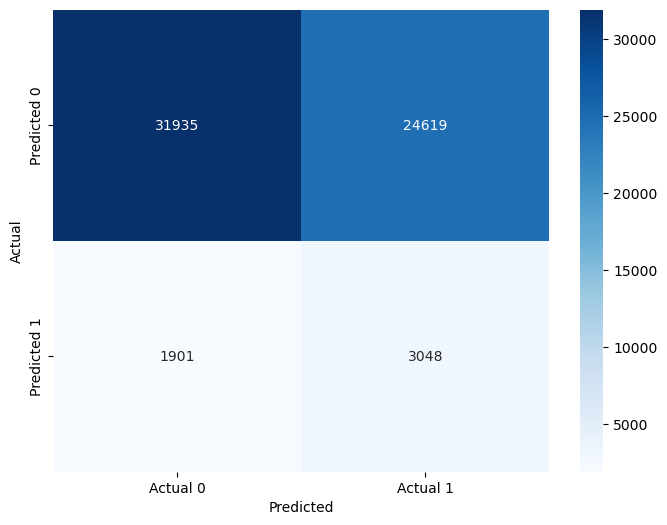

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, abc.predict(X_test))

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
ax.xaxis.set_ticklabels(['Actual 0', 'Actual 1'])
ax.yaxis.set_ticklabels(['Predicted 0', 'Predicted 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Result**

- True Positive: Predicted the loan was approved and it turned out to be correct 3048 times.

- True Negative: Predicted the loan was not approved and it turned out to be correct 31935 times.

- False Positive: Predicted the loan was approved and turned out to be wrong by 24619 times.

- False Negative: Predicted the loan was not approved and turned out to be wrong 1901 times.

#### Business Recomendation

- The top 3 features to predict the default clients are **DAYS_BIRTH, NAME_EDUCATION_TYPE and NAME_CONTRACT_TYPE**.
- Adjust product offerings and interest rates based on age groups.
- Create optimized marketing campaigns for each age group.
- Analyze the productivity of contract types.
- Offer financial education programs for specific education levels.